### 肘部分析法使用示例

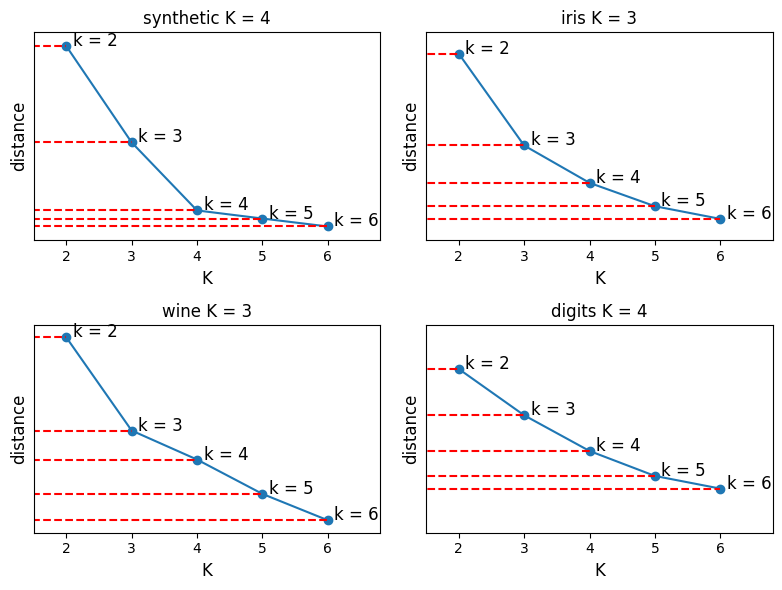

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


def elbow_analysis(X, range_n_clusters, all_cluster_labels, all_centers):
    all_dist = []
    for n, n_clusters in enumerate(range_n_clusters):
        cluster_labels = all_cluster_labels[n]
        centers = all_centers[n]
        dist = 0
        for i in range(n_clusters):  # 遍历每一个簇
            x_data = X[cluster_labels == i]
            tmp = np.sum((x_data - centers[i]) ** 2, axis=1)
            dist += np.sum(np.sqrt(tmp))
        all_dist.append(dist)
    plt.plot(range_n_clusters, all_dist)
    plt.scatter(range_n_clusters, all_dist)
    for i in range(len(range_n_clusters)):
        plt.annotate(f"k = {range_n_clusters[i]}",
                     xy=(range_n_clusters[i], all_dist[i]), fontsize=12,
                     xytext=(range_n_clusters[i] + 0.1, all_dist[i]))
        plt.hlines(all_dist[i], xmin=0, xmax=range_n_clusters[i], color="red", linestyle="--")
    plt.xlim(range_n_clusters[0] - 0.5, range_n_clusters[-1] + 0.8)
    plt.ylim(all_dist[-1] * 0.9, all_dist[0] + all_dist[-1] * 0.1)
    plt.yticks([])
    plt.xlabel("K", fontsize=12)
    plt.ylabel("distance", fontsize=12)


if __name__ == '__main__':
    datasets = {"synthetic": make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                                        center_box=(-10.0, 10.0), shuffle=True, random_state=1),
                "iris": load_iris(return_X_y=True),
                "wine": load_wine(return_X_y=True),
                "digits": load_digits(n_class=4, return_X_y=True)
                }
    plt.figure(figsize=(8, 6))
    row_plot = 2
    for i, (dataname, data) in enumerate(datasets.items()):
        X = data[0]
        range_n_clusters = [2, 3, 4, 5, 6]
        all_cluster_labels, all_centers = [], []
        for n_clusters in range_n_clusters:
            clusterer = KMeans(n_clusters=n_clusters, random_state=10)
            cluster_labels = clusterer.fit_predict(X)
            centers = clusterer.cluster_centers_
            all_cluster_labels.append(cluster_labels)
            all_centers.append(centers)
        plt.subplot(row_plot, len(datasets) // row_plot, i + 1)
        title = dataname + " K = " + str(len(np.unique(data[1])))
        plt.title(title)
        elbow_analysis(X, range_n_clusters, all_cluster_labels, all_centers)
    plt.tight_layout()
    plt.show()
